# Histogram Comparison Visualization
Compare the data from the survey and the original data. Only contains histograms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 7)
plt.style.use('ggplot')

cleanData = pd.read_csv("CleanData.csv")
cleanData = cleanData.drop("Unnamed: 0", 1)
cleanData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher_num,internet_num,romantic_num,paid_port_num,paid_math_num,paid_num,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,0,1,1,1.0,1.0,1,5.0,2.5,8.5,8.5
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,0,0,1,1.0,1.0,1,3.0,7.0,8.0,8.5
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,0,0,1,1.0,0.0,1,3.0,6.0,6.5,6.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,0,0,0,1.0,0.0,1,1.0,14.5,14.0,14.5
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,0,1,1,1.0,0.0,1,2.0,8.5,11.5,11.5


In [2]:
surveyData = pd.read_csv("SurveyData.csv")
surveyData = surveyData.drop("Unnamed: 0", 1)
surveyData.head()

,Timestamp,Are you a student at the University of Utah?,What is your gender?,age,What area do you live in?,How large is the family you live with?,Why did you choose the University of Utah?,What is your home to school commute time?,How many hours do you study a week for all of your classes?,How many classes have you failed in the past during your time at the University of Utah?,...,famsup_num,internet_num,romantic_num,freetime,Dalc,Walc,health,religious,schoolsup_num,paid_num
0,11/27/2016 14:27:50,Yes,Female,21.0,Urban,Greater than three,Program Preference,30 min to 1 hour,Greater than 10 hours,0,...,1,0,0,2,1,2,4.0,0,1,1
1,11/27/2016 14:59:32,Yes,Male,23.0,Urban,Less than or equal to three,Program Preference,15 min to 30 min,5 to 10 hours,1,...,1,0,1,4,1,1,4.0,1,1,1
2,11/27/2016 14:59:35,Yes,Male,25.0,Rural,Do not live with family,Program Preference,Less than 15 min,Greater than 10 hours,0,...,1,0,1,1,1,1,4.0,0,1,1
3,11/27/2016 14:59:41,Yes,Male,21.0,Suburban,Greater than three,Other,15 min to 30 min,Greater than 10 hours,0,...,1,0,1,4,1,2,5.0,1,1,1
4,11/27/2016 15:00:38,Yes,Male,25.0,Urban,Less than or equal to three,Program Preference,Less than 15 min,2 to 5 hours,0,...,1,0,0,3,1,1,4.0,0,1,1


In [3]:
def normalizedValueCounts(ser):
    x = ser.value_counts(normalize=True)
    rdx = [int(i) for i in x.index.values]
    x = x.reindex(rdx)
    return x

## Age

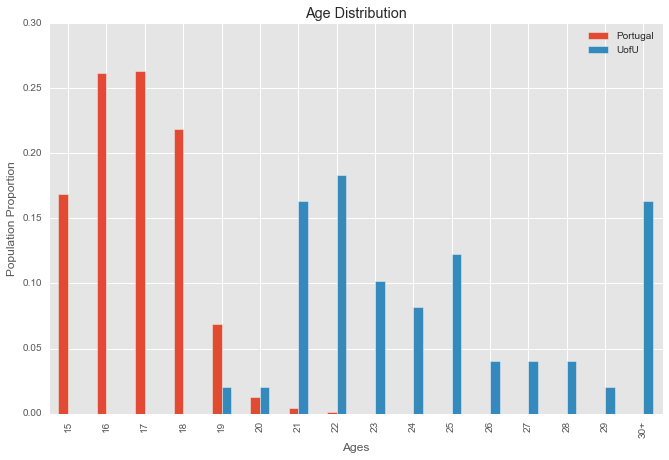

In [4]:
ages = list(range(15,31))
cleanCounts = normalizedValueCounts(cleanData["age"])
surveyCounts = normalizedValueCounts(surveyData["age"])
clean = [None for i in range(len(ages))]
survey = [None for i in range(len(ages))]

for idx, age in enumerate(ages):
    try:
        cc = cleanCounts.loc[age]
    except KeyError:
        cc = 0
    clean[idx] = cc
    
    try:
        sc = surveyCounts.loc[age]
    except KeyError:
        sc = 0
    survey[idx] = sc

over30 = surveyCounts.index.values[surveyCounts.index.values > 30]
survey[-1] = surveyCounts.loc[over30].sum()
d = {'Portugal':clean,
     'UofU':survey}
ages[-1] = '30+'
df = pd.DataFrame(d, index=ages)
ax = df.plot.bar(title='Age Distribution')
ax.set_xlabel('Ages')
ax.set_ylabel('Population Proportion')

## Failed Classes

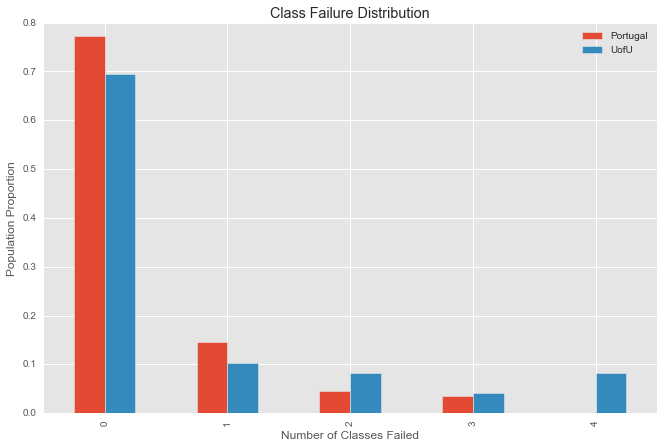

In [5]:
failures = list(range(5))
cleanCounts = normalizedValueCounts(cleanData["failures"])
surveyCounts = normalizedValueCounts(surveyData["failures"])
clean = [None for i in range(len(failures))]
survey = [None for i in range(len(failures))]

for idx, fail in enumerate(failures):
    try:
        cc = cleanCounts.loc[fail]
    except KeyError:
        cc = 0
    clean[idx] = cc
    
    try:
        sc = surveyCounts.loc[fail]
    except KeyError:
        sc = 0
    survey[idx] = sc
    
d = {'Portugal':clean,
     'UofU':survey}
df = pd.DataFrame(d, index=failures)
ax = df.plot.bar(title='Class Failure Distribution')
ax.set_xlabel('Number of Classes Failed')
ax.set_ylabel('Population Proportion')

## Free Time

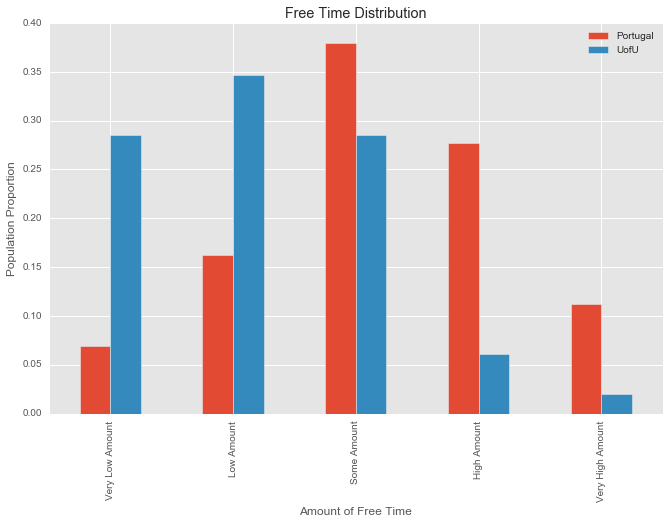

In [6]:
freeTime = list(range(1,6))
freeTimeText = ["Very Low Amount", "Low Amount", "Some Amount", "High Amount", "Very High Amount"]
cleanCounts = normalizedValueCounts(cleanData["freetime"])
surveyCounts = normalizedValueCounts(surveyData["freetime"])
clean = [None for i in range(len(failures))]
survey = [None for i in range(len(failures))]

for idx, free in enumerate(freeTime):
    try:
        cc = cleanCounts.loc[free]
    except KeyError:
        cc = 0
    clean[idx] = cc
    
    try:
        sc = surveyCounts.loc[free]
    except KeyError:
        sc = 0
    survey[idx] = sc
    
d = {'Portugal':clean,
     'UofU':survey}
df = pd.DataFrame(d, index=freeTimeText)
ax = df.plot.bar(title='Free Time Distribution')
ax.set_xlabel('Amount of Free Time')
ax.set_ylabel('Population Proportion')

## Weekday Consumption

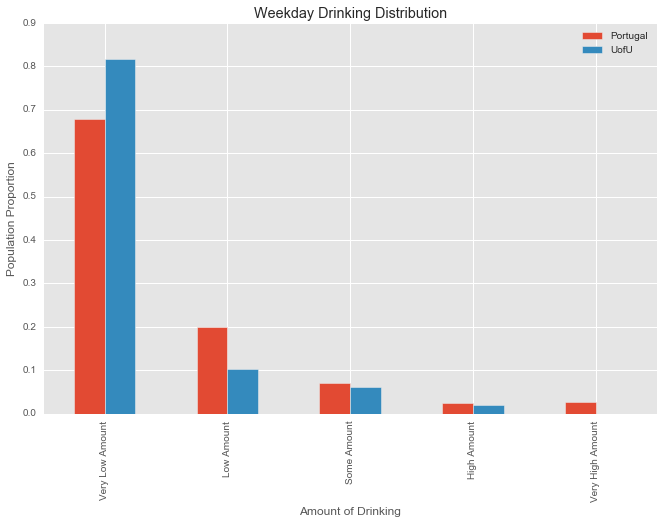

In [7]:
wdCon = list(range(1,6))
wdConText = ["Very Low Amount", "Low Amount", "Some Amount", "High Amount", "Very High Amount"]
cleanCounts = normalizedValueCounts(cleanData["Dalc"])
surveyCounts = normalizedValueCounts(surveyData["Dalc"])
clean = [None for i in range(len(wdCon))]
survey = [None for i in range(len(wdCon))]

for idx, drink in enumerate(wdCon):
    try:
        cc = cleanCounts.loc[drink]
    except KeyError:
        cc = 0
    clean[idx] = cc
    
    try:
        sc = surveyCounts.loc[drink]
    except KeyError:
        sc = 0
    survey[idx] = sc
    
d = {'Portugal':clean,
     'UofU':survey}
df = pd.DataFrame(d, index=wdConText)
ax = df.plot.bar(title='Weekday Drinking Distribution')
ax.set_xlabel('Amount of Drinking')
ax.set_ylabel('Population Proportion')

## Weekend Consumption

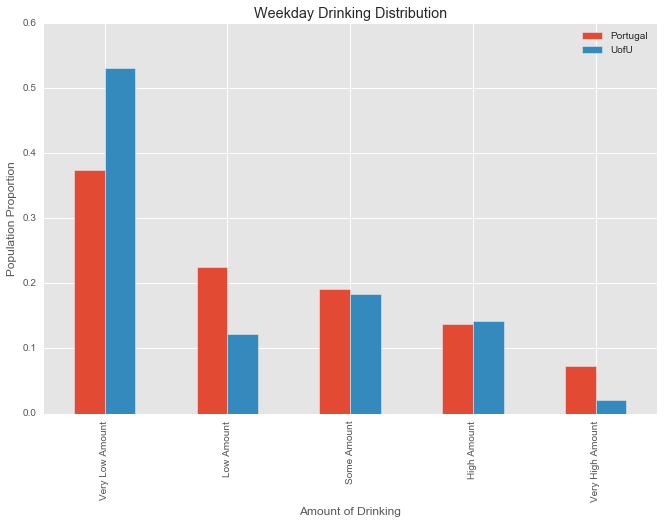

In [8]:
weCon = list(range(1,6))
weConText = ["Very Low Amount", "Low Amount", "Some Amount", "High Amount", "Very High Amount"]
cleanCounts = normalizedValueCounts(cleanData["Walc"])
surveyCounts = normalizedValueCounts(surveyData["Walc"])
clean = [None for i in range(len(weCon))]
survey = [None for i in range(len(weCon))]

for idx, drink in enumerate(weCon):
    try:
        cc = cleanCounts.loc[drink]
    except KeyError:
        cc = 0
    clean[idx] = cc
    
    try:
        sc = surveyCounts.loc[drink]
    except KeyError:
        sc = 0
    survey[idx] = sc
    
d = {'Portugal':clean,
     'UofU':survey}
df = pd.DataFrame(d, index=weConText)
ax = df.plot.bar(title='Weekday Drinking Distribution')
ax.set_xlabel('Amount of Drinking')
ax.set_ylabel('Population Proportion')